# Segment & Cluster Toronto Neighborhoods
by: Diardano Raihan (Indonesia)
<hr>

__Objective__:
- Previously, we have succeeded to retrieve the latitude and longitude coordinate in `Pre2_Coordinate_Retrieval.ipynb`notebook file. 


- Now, we will __explore__, __segment__, and __group neighborhoods__ into clusters to find similar neighborhoods in __Toronto City__.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

## Load Data

Let's import `toronto_poscode_latlng.csv` and turn it into a dataframe:

In [19]:
toronto_df = pd.read_csv('datasets/toronto_poscode_latlng.csv')
print(toronto_df.shape)
toronto_df.head()

(103, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


In [713]:
toronto_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


As you might have guessed by now, for each postal code, we can have more than one neighborhood. From now on, we will treat each postal code as a neighborhood also. Let's see how many boroughs and postal codes (neighborhoods) we got:

In [20]:
print('The dataframe has {} boroughs and {} postal codes.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 postal codes.


## Map: Toronto & Neighborhoods

Now that we have data required to create a map of each neighborhood coordinate using __Folium__ module. 

What's left is to define the coordinate of Toronto City itself. We can do get the coordinate using __Geopy__ library.

In [21]:
from geopy.geocoders import Nominatim

address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


Now, we can see the neighbourhoods being superimposed on top of the city

In [22]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['latitude'], toronto_df['longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Map: A Borough and Neighborhoods

We will pick boroughs that contain _'toronto'_ name in it.
Let's see what boroughs those are:

In [23]:
toronto_df.groupby(by='Borough').count().sort_values(by='Neighbourhood', ascending=False)

,PostalCode,Neighbourhood,latitude,longitude
Borough,,,,
North York,24,24,24,24
Downtown Toronto,19,19,19,19
Scarborough,17,17,17,17
Etobicoke,12,12,12,12
Central Toronto,9,9,9,9
West Toronto,6,6,6,6
East Toronto,5,5,5,5
East York,5,5,5,5
York,5,5,5,5


Say you currently live at _Northwest_, __Etobicoke__, and you got a new job at __Downtown Toronto__. You want to move there but trying to find a settlement as the same as your current neighborhood.

We will name it __`downtown_df`__ dataframe to rerpresent all neghborhoods containing both boroughs.

In [236]:
# downtown_df = toronto_df[toronto_df.Borough.str.contains('Toronto') == True].reset_index(drop=True)
# downtown_df = toronto_df[(toronto_df['Borough']=='Downtown Toronto') | (toronto_df['Borough']=='Etobicoke')].reset_index(drop=True)

boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='East York') | (toronto_df['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(19, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [238]:
# downtown_df['Neighbourhood'].replace('St. James Town, Cabbagetown', 'Cabbagetown', inplace=True)

boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])

boroughs_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349
5,M4H,East York,Thorncliffe Park,43.70142,-79.34905
6,M4J,East York,East Toronto,43.68811,-79.33418
7,M6M,York,Del Ray,43.69517,-79.48397
8,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713
9,M5N,Central Toronto,Roselawn,43.71208,-79.41848


Let's get the geographical coordinates of North York.

In [249]:
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.65238435, -79.38356765.


Let's visualize Downtown Toronto and Etobicokewith neighborhoods.

In [250]:
# create map of Toronto using latitude and longitude values
map_Boroughs = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(boroughs_df['latitude'], boroughs_df['longitude'], boroughs_df['Borough'], boroughs_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boroughs)  
    
map_Boroughs

## Explore a Neighborhood in The Selected Boroughs

Now, we will utilize the FourSquare API to explore Downtown neighborhoods and segment them

1. __Define Foursquare Credentials and Version__

In [251]:
# @hidden_cell
CLIENT_ID = 'A4BZ4XU5N3JCM5ROZ05CQIZAKB3MURVFNOM24TRHJOOJIMB3' # your Foursquare ID
CLIENT_SECRET = 'I2QABIKFWWEMWYXZIMRFXK4IFSSXTRGG4EPEEVHWP0QYUCYY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

2. __Let's explore the first neighborhood in our dataframe.__

In [252]:
boroughs_df.head(1)

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192


In [254]:
print('First neighborhood: {}'.format(boroughs_df.loc[0,'Neighbourhood']))

First neighborhood: Parkview Hill


- Get the location coordinate of the neighborhood

In [255]:
neighborhood_latitude = boroughs_df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = boroughs_df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = boroughs_df.loc[0, 'Neighbourhood'] # neighborhood name

print('The coordinate values of {} are\n- latitude: {},\n- longitude: {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

The coordinate values of Parkview Hill are
- latitude: 43.70718000000005,
- longitude: -79.31191999999999.


3. __Now, let's get the top 100 venues that are in Parkview Hill within a radius of 500 meters.__

- Create a GET request URL

In [362]:

LIMIT = 100
RADIUS = 750

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude,
        RADIUS,
        LIMIT)
# url

- Send the GET request and examine the resutls

In [363]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb68173164c641f7bbe2885'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': "O'Connor - Parkview",
  'headerFullLocation': "O'Connor - Parkview, Toronto",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 43.713930006750054,
    'lng': -79.30259978299036},
   'sw': {'lat': 43.70042999325005, 'lng': -79.32124021700962}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6db61ff964a520b9882ce3',
       'name': 'Toronto Climbing Academy',
       'location': {'address': '11 Curity Ave',
        'lat': 43.709362,
        'lng': -79.315006,
        'labeledLatLngs': [{'label': 'display',
          

In [364]:
results['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b6db61ff964a520b9882ce3',
   'name': 'Toronto Climbing Academy',
   'location': {'address': '11 Curity Ave',
    'lat': 43.709362,
    'lng': -79.315006,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.709362,
      'lng': -79.315006}],
    'distance': 347,
    'postalCode': 'M4B 1X4',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['11 Curity Ave', 'Toronto ON M4B 1X4', 'Canada']},
   'categories': [{'id': '50328a4b91d4c4b30a586d6b',
     'name': 'Rock Climbing Spot',
     'pluralName': 'Rock Climbing Spots',
     'shortName': 'Rock Climbing',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/rockclimbing_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4b

- Based on observation, it seems that all the information is in the __items__ key. Let's put that into a list of venues.

In [365]:
import json # library to handle JSON files
from pandas import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.neighborhood,venue.venuePage.id
0,e-0-4b6db61ff964a520b9882ce3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b6db61ff964a520b9882ce3,Toronto Climbing Academy,11 Curity Ave,43.709362,-79.315006,"[{'label': 'display', 'lat': 43.709362, 'lng':...",347,...,Toronto,ON,Canada,"[11 Curity Ave, Toronto ON M4B 1X4, Canada]","[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",0,[],NaN,NaN,NaN
1,e-0-4b5a3842f964a52023b528e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b5a3842f964a52023b528e3,Jawny Bakers,804 O'Connor Dr,43.705783,-79.312913,"[{'label': 'display', 'lat': 43.705782646822, ...",174,...,Toronto,ON,Canada,"[804 O'Connor Dr (St Clair E), Toronto ON M4B ...","[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",0,[],St Clair E,NaN,NaN


- Okay, we have redundant columns that we do not need. We can filter the dataframe containing data columns needed only. 

In [366]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Toronto Climbing Academy,"[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",43.709362,-79.315006
1,Jawny Bakers,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",43.705783,-79.312913


- The column __venue.categories__ is DISASTROUS!!! Let's extract the category `name` only inside that list of dictionary.

In [367]:
nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(lambda x: x[0]['name'])
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006
1,Jawny Bakers,Gastropub,43.705783,-79.312913


- SWEET!!!! Let's clean the column names and see the how many venues returned by FourSquare

In [368]:
nearby_venues.columns = [column.split('.')[-1] for column in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

23 venues were returned by Foursquare.


,name,categories,lat,lng
0,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006
1,Jawny Bakers,Gastropub,43.705783,-79.312913
2,Muddy York Brewing Co.,Brewery,43.712362,-79.312019
3,East York Gymnastics,Gym / Fitness Center,43.710654,-79.309279
4,Peek Freans Cookie Outlet,Bakery,43.713260,-79.308063


## Explore Neihborhoods in The Selected Boroughs

- __Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto__

_Double click __here__ for the explanation_
<!--
[item for venue_list in venues_list for item in venue_list]
equals to:

for venue_list in downtown_venues:
    for item in venue_list:
        print(item)

- Result
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Roselle Desserts', 
 43.653446723052674, -79.3620167174383, 'Bakery')
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Tandem Coffee', 
 43.65355870959944, -79.36180945913513, 'Coffee Shop')
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Figs Breakfast & Lunch', 
 43.65567455427388, -79.3645032892494, 'Breakfast Spot')
.......

-->

In [513]:
# get_nerby_venues(downtown_df['neighbourhood'], downtown_df['latitude'], downtown_df['longitude'])
# Return downtown_venues
def get_nearby_venues(neighborhoods, latitudes, longitudes):
    
    # Define default resul limit and radius
    LIMIT = 100
    RADIUS = 1000
    
    # Define an empty venue list
    venues_list = []
    
    # Loop for each neighborhood (i.e. 1st neighborhood = Regent Park)
    for neighborhood, lat, lng in zip(neighborhoods, latitudes, longitudes):
        # Confirm the name of naighborhood
        print(neighborhood) # Regent Park
        
        # Create an API URL for each neighborhood to explore its venues
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                RADIUS,
                LIMIT)
        
        # Make the GET request and return a JSON file
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information for each nearby venue (explanation is below the notebook)
        venues_list.append([(neighborhood, 
                            lat, 
                            lng,  
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])    
    nearby_venues.columns = ['Neighborhood', 
          'Neighborhood Latitude', 
          'Neighborhood Longitude', 
          'Venue', 
          'Venue Latitude', 
          'Venue Longitude', 
          'Venue Category']
    
    return(nearby_venues)

In [514]:
# type your answer here
boroughs_venues = get_nearby_venues(boroughs_df['Neighbourhood'], 
                                   boroughs_df['latitude'], 
                                   boroughs_df['longitude'])

Parkview Hill
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
East Toronto
Del Ray
Lawrence Park
Roselawn
Runnymede
Weston
Davisville North
Forest Hill North & West
North Toronto West
The Annex
Davisville
Moore Park
Summerhill West


In [515]:
print(boroughs_venues.shape)
boroughs_venues.to_csv('datasets/boroughs_venues.csv', index=False)
boroughs_venues.head()

(905, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery


In [516]:
boroughs_venues[boroughs_venues.Neighborhood=='Roselawn']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
320,Roselawn,43.71208,-79.41848,Belt Line Trail,43.704396,-79.424254,Trail
321,Roselawn,43.71208,-79.41848,Forest Hill Arena,43.704289,-79.420367,Skating Rink
322,Roselawn,43.71208,-79.41848,TD Canada Trust,43.712212,-79.428233,Bank
323,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.712652,-79.428040,Pharmacy
324,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.703442,-79.415367,Pharmacy
325,Roselawn,43.71208,-79.41848,Jewel & Java Café,43.712467,-79.427999,Café


Let's check how many venues were returned for each neighborhood

In [517]:
boroughs_venues.groupby( by='Neighborhood').count().sort_values(by='Venue', ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,100,100,100,100,100,100
Davisville North,100,100,100,100,100,100
The Annex,100,100,100,100,100,100
Summerhill West,89,89,89,89,89,89
Woodbine Heights,68,68,68,68,68,68
Moore Park,66,66,66,66,66,66
Leaside,61,61,61,61,61,61
East Toronto,60,60,60,60,60,60
North Toronto West,49,49,49,49,49,49


__Let's find out how many unique categories can be curated from all the returned venues__

In [518]:
print('There are {} unique venue categories.'.format(len(boroughs_venues['Venue Category'].unique())))

There are 172 unique venue categories.


## Analyze Each Neighborhood

__Our next objective is to create a dataframe containing the top 10 venues for each neighborhood.__

__1. First, we will do the One Hot Encoding to the venue category for each neighborhood.__

In [519]:
# one hot encoding and adjust the name prefix
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to the dataframe
boroughs_onehot['Neighbourhood'] = boroughs_venues['Neighborhood']

# # move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]
boroughs_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [520]:
len(boroughs_onehot.Neighbourhood.unique())

19

- And let's examine the new dataframe size.

In [521]:
print(boroughs_onehot.shape)

(905, 173)


__2. Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__


In [522]:
boroughs_grouped = boroughs_onehot.groupby(by='Neighbourhood').mean().reset_index()
boroughs_grouped

,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,0.010000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000
2,Davisville North,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.00,0.000000,0.020000
3,Del Ray,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,East Toronto,0.000000,0.033333,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Forest Hill North & West,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.027027,...,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Humewood-Cedarvale,0.000000,0.031250,0.000000,0.00,0.000000,0.000000,0.031250,0.00,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Lawrence Park,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Leaside,0.000000,0.000000,0.000000,0.00,0.000000,0.016393,0.016393,0.00,0.016393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Moore Park,0.000000,0.015152,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.00,0.000000,0.015152


Let's confirm the new size


In [523]:
boroughs_grouped.shape

(19, 173)

__3. Let's create a dataframe with the top 10 most common venues__

- Define a function to sort the venues in descending order.

_Double-click **here** for the explanation._

<!--
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

RESULT:
# ----Battery Park City----
#            venue  freq
# 0           Park  0.09
# 1          Hotel  0.08
# 2    Coffee Shop  0.06
# 3            Gym  0.06
# 4  Memorial Site  0.05


# ----Carnegie Hill----
#                   venue  freq
# 0           Coffee Shop  0.09
# 1                  Café  0.05
# 2           Yoga Studio  0.03
# 3     French Restaurant  0.03
# 4  Gym / Fitness Center  0.03

-->

In [524]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

- Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [525]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # Add column names such as 1st, 2nd, 3rd Most Common Venue
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        # Add column names such as 4th, 5th, .. ,10th Most Common Venue
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# In the end, we have:
# columns == ['Neighborhood', '1st Most Common Venue', .. , '10th Most Common Venue']        

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighbourhood']

for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)

In [526]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant
1,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Indian Restaurant,Café,Restaurant,Pizza Place,Dessert Shop,Gym,Bakery
2,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Restaurant,Gym,Fast Food Restaurant,Park,Japanese Restaurant
3,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant
4,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar


In [527]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant
1,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Indian Restaurant,Café,Restaurant,Pizza Place,Dessert Shop,Gym,Bakery
2,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Restaurant,Gym,Fast Food Restaurant,Park,Japanese Restaurant
3,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant
4,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar
5,Forest Hill North & West,Park,Café,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Sushi Restaurant,Pharmacy,Bank,Middle Eastern Restaurant,Dry Cleaner
6,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant
7,Lawrence Park,Café,Bus Line,Gym / Fitness Center,Park,Restaurant,College Quad,Coffee Shop,Trail,Yoga Studio,Dog Run
8,Leaside,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant
9,Moore Park,Coffee Shop,Grocery Store,Italian Restaurant,Gym,Park,Thai Restaurant,Pizza Place,Bank,Playground,Restaurant


<a id='item4'></a>

## Cluster the Neighborhoods

__1. Run _k_-means to cluster the neighborhood using different k centroids.__


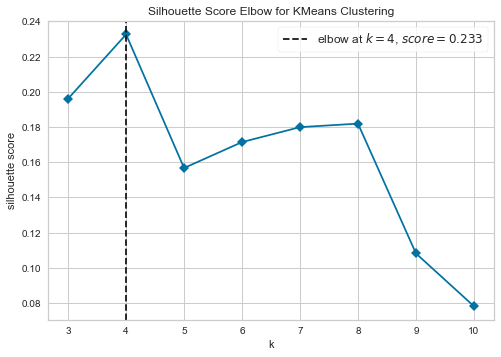

In [610]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# set number of clusters
# kclusters = 6
kclusters = (3,11)

boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)
model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(boroughs_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

The plot shows that the highest Calinski-Harabasz value occurs at four clusters, suggesting that the optimal number of clusters is four.

In [625]:
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1])

__2. Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.__


In [626]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery,1
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store,1
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,1
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant,1
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant,1


In [641]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,1,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery
1,East York,Woodbine Heights,1,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store
2,York,Humewood-Cedarvale,1,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant
3,York,Caledonia-Fairbanks,1,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant
4,East York,Leaside,1,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant
5,East York,Thorncliffe Park,1,Indian Restaurant,Afghan Restaurant,Restaurant,Turkish Restaurant,Coffee Shop,Grocery Store,Greek Restaurant,Pub,Pool,Pizza Place
6,East York,East Toronto,1,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar
7,York,Del Ray,3,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant
8,Central Toronto,Lawrence Park,1,Café,Bus Line,Gym / Fitness Center,Park,Restaurant,College Quad,Coffee Shop,Trail,Yoga Studio,Dog Run
9,Central Toronto,Roselawn,2,Pharmacy,Trail,Bank,Café,Skating Rink,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Dry Cleaner


In [643]:
temp = boroughs_merged[[column for column in boroughs_merged.columns if (column.startswith('1st')) | (column.startswith('2')) | (column.startswith('3')) | (column=='Cluster Labels')]]
temp

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,Gym / Fitness Center,Pizza Place,Intersection,1
1,Pizza Place,Coffee Shop,Ice Cream Shop,1
2,Pizza Place,Coffee Shop,Convenience Store,1
3,Pizza Place,Park,Coffee Shop,1
4,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,1
5,Indian Restaurant,Afghan Restaurant,Restaurant,1
6,Coffee Shop,Café,Sandwich Place,1
7,Park,Convenience Store,Grocery Store,3
8,Café,Bus Line,Gym / Fitness Center,1
9,Pharmacy,Trail,Bank,2


In [628]:
# boroughs_merged.iloc[9,:]

In [629]:
# Remove any NaN
# boroughs_merged.dropna(inplace=True)
# boroughs_merged.shape

In [630]:
# boroughs_merged['Cluster Labels']=boroughs_merged['Cluster Labels'].astype('int64')
# boroughs_merged.info()

__3. Finally, let's visualize the resulting clusters__

In [639]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['latitude'], boroughs_merged['longitude'], boroughs_merged['Neighbourhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

<a id=''></a>

# Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

## Cluster 1

In [648]:
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_0

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
10,Runnymede,Gas Station,Brewery,Department Store,BBQ Joint,Indian Restaurant,Beer Store,Thai Restaurant,Café,Thrift / Vintage Store,Coffee Shop,0


## Cluster 2

In [714]:
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_1.shape)
cluster_1

(16, 12)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Parkview Hill,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery,1
1,Woodbine Heights,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store,1
2,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,1
3,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant,1
4,Leaside,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant,1
5,Thorncliffe Park,Indian Restaurant,Afghan Restaurant,Restaurant,Turkish Restaurant,Coffee Shop,Grocery Store,Greek Restaurant,Pub,Pool,Pizza Place,1
6,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar,1
8,Lawrence Park,Café,Bus Line,Gym / Fitness Center,Park,Restaurant,College Quad,Coffee Shop,Trail,Yoga Studio,Dog Run,1
11,Weston,Train Station,Pizza Place,Coffee Shop,Pharmacy,Soccer Field,Laundromat,Skating Rink,Diner,Sandwich Place,Fried Chicken Joint,1
12,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Restaurant,Gym,Fast Food Restaurant,Park,Japanese Restaurant,1


In [663]:
first = cluster_1.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first

,Venue,Neighbourhood
0,Coffee Shop,6
1,Pizza Place,3
2,Café,1
3,Gym / Fitness Center,1
4,Indian Restaurant,1
5,Italian Restaurant,1
6,Park,1
7,Restaurant,1
8,Train Station,1


In [664]:
second = cluster_1[['Neighbourhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
second.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second

,Venue,Neighbourhood
0,Coffee Shop,3
1,Italian Restaurant,3
2,Café,2
3,Pizza Place,2
4,Afghan Restaurant,1
5,Bus Line,1
6,Grocery Store,1
7,Park,1
8,Sporting Goods Shop,1
9,Sushi Restaurant,1


In [665]:
third = cluster_1[['Neighbourhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
third.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third

,Venue,Neighbourhood
0,Coffee Shop,3
1,Italian Restaurant,2
2,Café,1
3,Convenience Store,1
4,Furniture / Home Store,1
5,Gym,1
6,Gym / Fitness Center,1
7,Ice Cream Shop,1
8,Intersection,1
9,Restaurant,1


In [675]:
cluster_0_top3 = pd.concat([first, second, third])
cluster_0_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighbourhood', ascending=False)
cluster_0_top3

,Neighbourhood
Venue,
Coffee Shop,12
Italian Restaurant,6
Pizza Place,5
Café,4
Sushi Restaurant,2
Gym / Fitness Center,2
Restaurant,2
Park,2
Afghan Restaurant,1


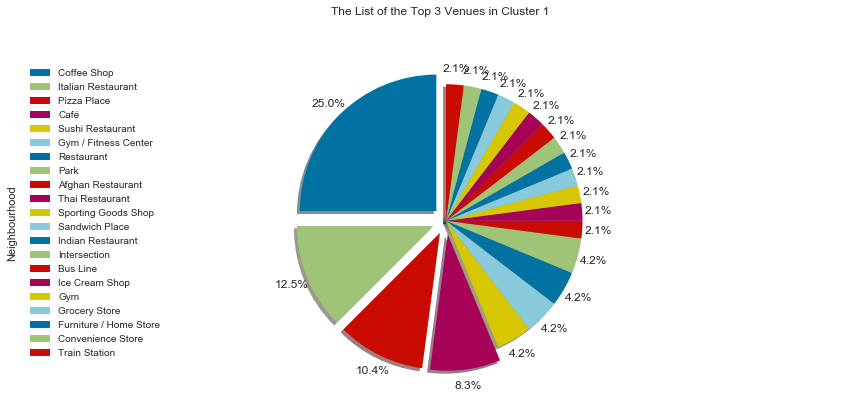

In [701]:
# colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each venue with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

cluster_0_top3['Neighbourhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
#                             colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('The List of the Top 3 Venues in Cluster 1', y=1.12, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=cluster_0_top3.index, loc='upper left') 

plt.show()

## Cluster 3

In [650]:
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,Roselawn,Pharmacy,Trail,Bank,Café,Skating Rink,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Dry Cleaner,2


## Cluster 4

In [702]:
cluster_3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant,3


We can merge cluster_0, cluster_2, and cluster_3 to have better insight

In [712]:
cluster_merged = pd.concat([ cluster_0, cluster_2, cluster_3]).reset_index()
column = [column for column in cluster_merged.columns if column.endswith('Venue')]
cluster_merged[['Cluster Labels','Neighbourhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,Runnymede,Gas Station,Brewery,Department Store,BBQ Joint,Indian Restaurant
2,Roselawn,Pharmacy,Trail,Bank,Café,Skating Rink
3,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place
